In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf

df = pd.read_csv('D:\\Real Time Finance API Client\\Data\\all_stocks_daily_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

stock_cols = [col for col in df.columns if col != 'Market_Portfolio']

for stock in stock_cols:
    stock_data = df[stock].dropna()
    
    print(f"\n{'='*50}")
    print(f"Statistical Metrics for {stock}")
    print(f"{'='*50}")
    
    print(f"Mean: {stock_data.mean():.5f}")
    
    print(f"Variance: {stock_data.var():.5f}")
    
    if 'Market_Portfolio' in df.columns:
        cov = stock_data.cov(df['Market_Portfolio'].dropna())
        print(f"Covariance with Market_Portfolio: {cov:.5f}")
    
    if 'Market_Portfolio' in df.columns:
        corr = stock_data.corr(df['Market_Portfolio'].dropna())
        print(f"Correlation with Market_Portfolio: {corr:.5f}")
    
    acf_val = acf(stock_data, nlags=1, fft=False)[1]
    print(f"Autocorrelation (lag=1): {acf_val:.5f}")



Statistical Metrics for AAPL
Mean: -0.00055
Variance: 0.00069
Autocorrelation (lag=1): -0.04093

Statistical Metrics for MSFT
Mean: 0.00339
Variance: 0.00032
Autocorrelation (lag=1): -0.05796

Statistical Metrics for GOOGL
Mean: 0.00167
Variance: 0.00047
Autocorrelation (lag=1): -0.04499

Statistical Metrics for TSLA
Mean: 0.00387
Variance: 0.00231
Autocorrelation (lag=1): -0.04188

Statistical Metrics for AMZN
Mean: 0.00122
Variance: 0.00067
Autocorrelation (lag=1): -0.12428


C:\Users\mohxm\AppData\Local\Temp\ipykernel_12576\3805950886.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='magma')


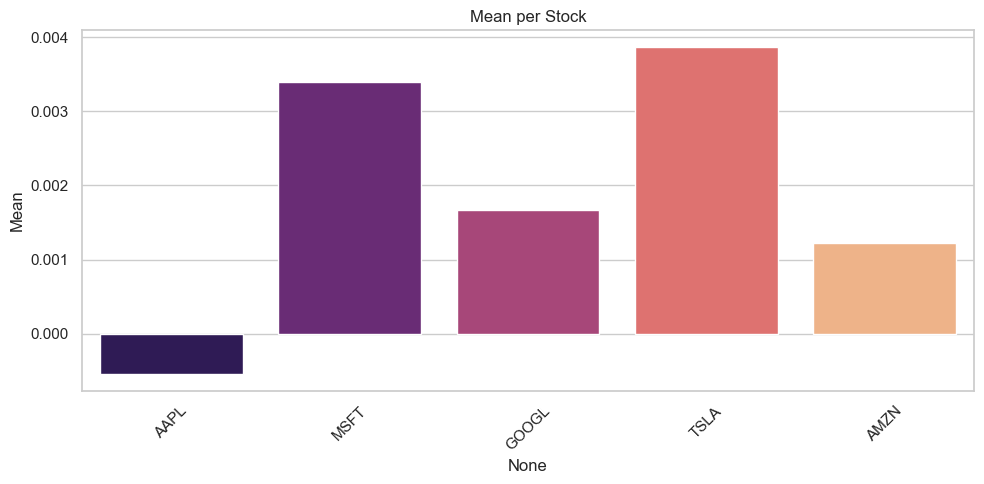

C:\Users\mohxm\AppData\Local\Temp\ipykernel_12576\3805950886.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='magma')


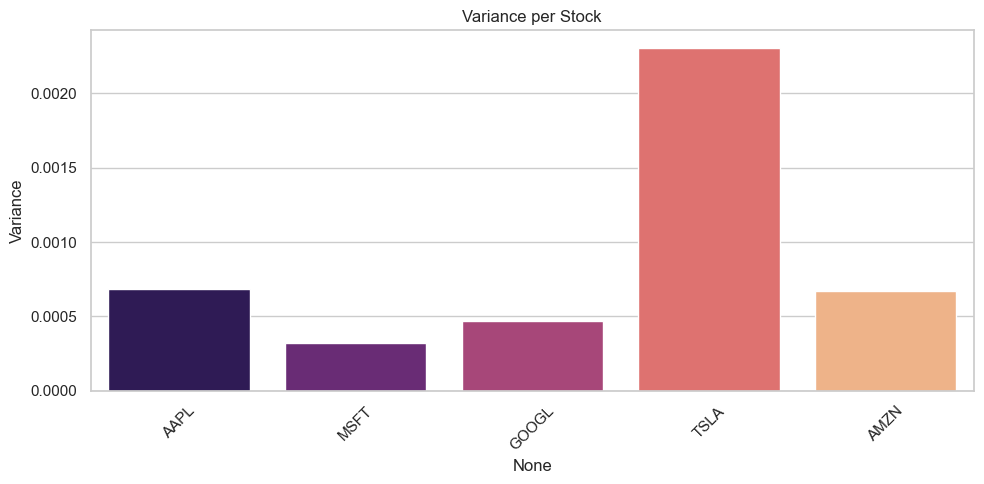

C:\Users\mohxm\AppData\Local\Temp\ipykernel_12576\3805950886.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='magma')


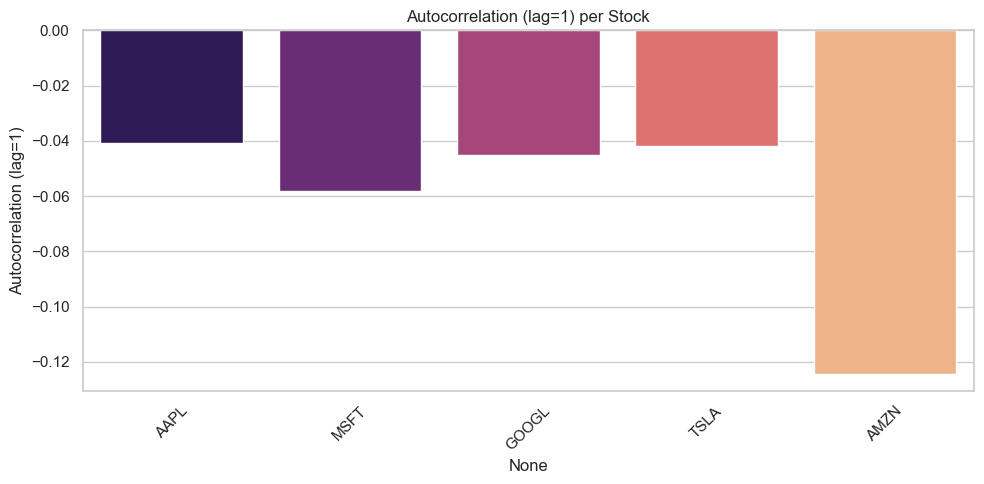

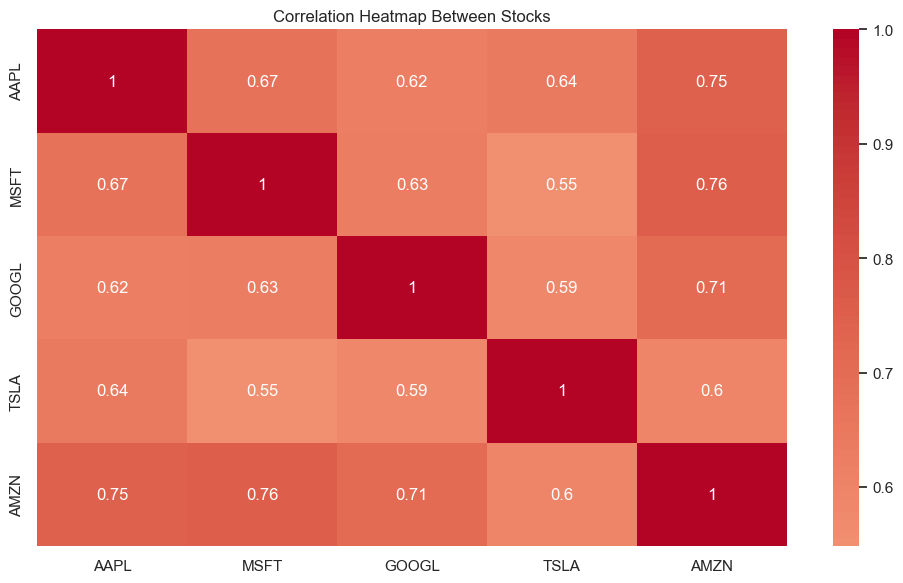

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

df = pd.read_csv('D:\\Real Time Finance API Client\\Data\\all_stocks_daily_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

stock_cols = [col for col in df.columns if col != 'Market_Portfolio']

mean_dict = {}
variance_dict = {}
autocorr_dict = {}

for stock in stock_cols:
    stock_data = df[stock].dropna()
    mean_dict[stock] = stock_data.mean()
    variance_dict[stock] = stock_data.var()
    autocorr_dict[stock] = acf(stock_data, nlags=1, fft=False)[1]

metrics_df = pd.DataFrame({
    'Mean': mean_dict,
    'Variance': variance_dict,
    'Autocorrelation (lag=1)': autocorr_dict
}).T

metrics_df = metrics_df.T

sns.set(style='whitegrid')
for metric in metrics_df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='magma')
    plt.title(f'{metric} per Stock')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[stock_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap Between Stocks")
plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import skew, kurtosis
print(f"Skewness: {skew(df[stock].dropna()):.5f}")
print(f"Kurtosis: {kurtosis(df[stock].dropna(), fisher=False):.5f}")


Skewness: 0.39543
Kurtosis: 8.83618


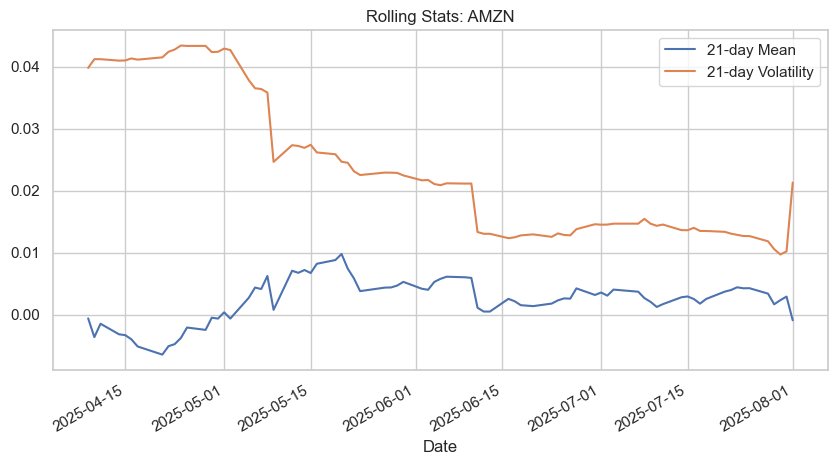

In [6]:
plt.figure(figsize=(10,5))
df[stock].rolling(window=21).mean().plot(label='21-day Mean')
df[stock].rolling(window=21).std().plot(label='21-day Volatility')
plt.legend()
plt.title(f'Rolling Stats: {stock}')
plt.show()


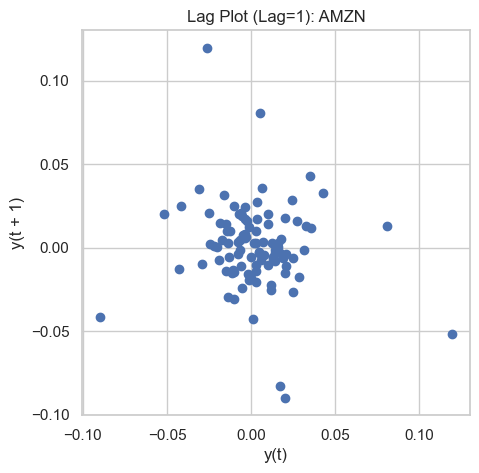

In [7]:
from pandas.plotting import lag_plot
plt.figure(figsize=(5,5))
lag_plot(df[stock].dropna(), lag=1)
plt.title(f'Lag Plot (Lag=1): {stock}')
plt.show()


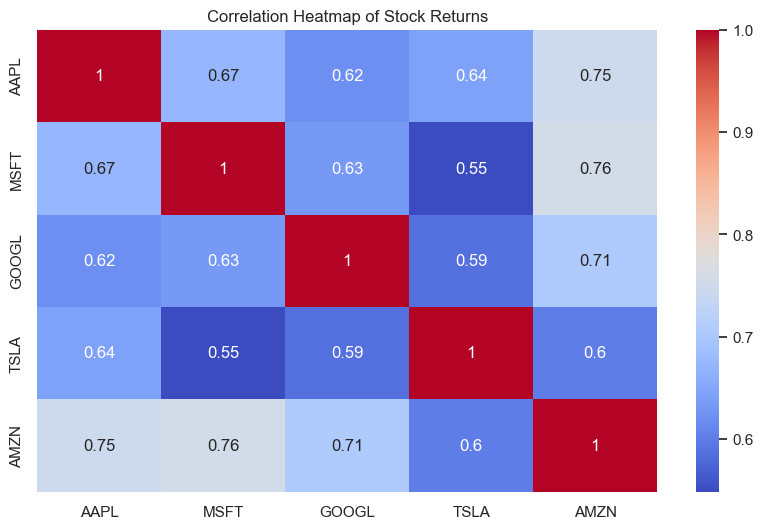

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[stock_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Returns')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import jarque_bera, normaltest, shapiro, kstest, skew, kurtosis
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import durbin_watson
from arch import arch_model
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('D:\\Real Time Finance API Client\\Data\\all_stocks_daily_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
stock_cols = [col for col in df.columns if col != 'Market_Portfolio']

print("=" * 60)
print("NORMALITY TESTS")
print("=" * 60)

normality_results = {}
for stock in stock_cols:
    data = df[stock].dropna()

    jb_stat, jb_pval = jarque_bera(data)
    dt_stat, dt_pval = normaltest(data)
    sw_stat, sw_pval = shapiro(data) if len(data) <= 5000 else (np.nan, np.nan)
    ks_stat, ks_pval = kstest(data, 'norm', args=(data.mean(), data.std()))

    normality_results[stock] = {
        'Jarque-Bera p-value': jb_pval,
        'D\'Agostino p-value': dt_pval,
        'Shapiro-Wilk p-value': sw_pval,
        'Kolmogorov-Smirnov p-value': ks_pval,
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data, fisher=False),
        'Excess Kurtosis': kurtosis(data, fisher=True)
    }

    print(f"\n{stock}:")
    print(f"  Jarque-Bera p-value: {jb_pval:.5f} {'(Normal)' if jb_pval > 0.05 else '(Non-normal)'}")
    print(f"  Skewness: {skew(data):.5f}")
    print(f"  Kurtosis: {kurtosis(data, fisher=False):.5f}")


NORMALITY TESTS

AAPL:
  Jarque-Bera p-value: 0.00000 (Non-normal)
  Skewness: 1.40032
  Kurtosis: 15.36389

MSFT:
  Jarque-Bera p-value: 0.00000 (Non-normal)
  Skewness: 2.15775
  Kurtosis: 13.39549

GOOGL:
  Jarque-Bera p-value: 0.00000 (Non-normal)
  Skewness: 0.22271
  Kurtosis: 6.54305

TSLA:
  Jarque-Bera p-value: 0.00000 (Non-normal)
  Skewness: 0.77019
  Kurtosis: 7.18112

AMZN:
  Jarque-Bera p-value: 0.00000 (Non-normal)
  Skewness: 0.39543
  Kurtosis: 8.83618



STATIONARITY TESTS (ADF)
AAPL: ADF p-value = 0.00000 (Stationary)
MSFT: ADF p-value = 0.00000 (Stationary)
GOOGL: ADF p-value = 0.00004 (Stationary)
TSLA: ADF p-value = 0.00000 (Stationary)
AMZN: ADF p-value = 0.00000 (Stationary)

HETEROSCEDASTICITY TESTS
AAPL: Heteroscedasticity test failed
MSFT: Heteroscedasticity test failed
GOOGL: Heteroscedasticity test failed
TSLA: Heteroscedasticity test failed
AMZN: Heteroscedasticity test failed

ARCH EFFECTS TESTING
AAPL: ARCH p-value = 0.07381 (No ARCH effects)
MSFT: ARCH p-value = 0.71479 (No ARCH effects)
GOOGL: ARCH p-value = 0.59118 (No ARCH effects)
TSLA: ARCH p-value = 0.53959 (No ARCH effects)
AMZN: ARCH p-value = 0.18985 (No ARCH effects)

AUTOCORRELATION ANALYSIS


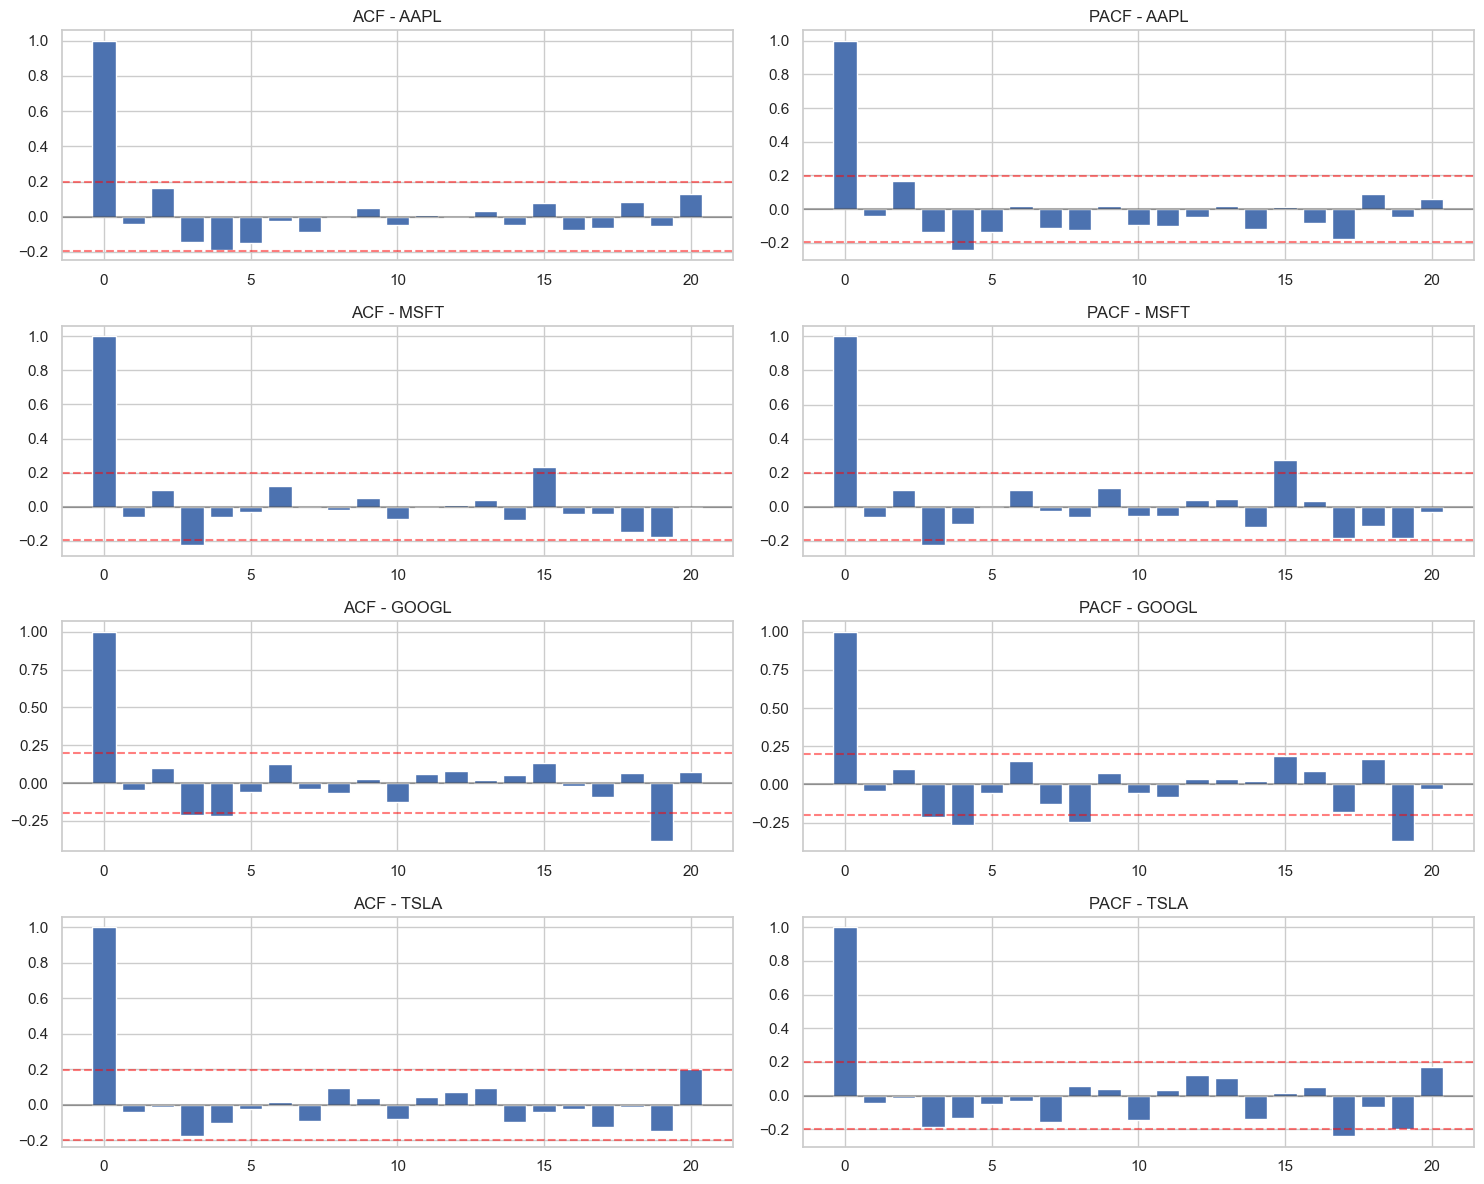


DURBIN-WATSON TEST (Serial Correlation)
AAPL: DW = 2.0678 (No significant autocorrelation)
MSFT: DW = 2.0274 (No significant autocorrelation)
GOOGL: DW = 2.0657 (No significant autocorrelation)
TSLA: DW = 2.0452 (No significant autocorrelation)
AMZN: DW = 2.1350 (No significant autocorrelation)

OUTLIER DETECTION
AAPL: Z-score outliers: 2 (2.02%), IQR outliers: 10 (10.10%)
MSFT: Z-score outliers: 2 (2.02%), IQR outliers: 10 (10.10%)
GOOGL: Z-score outliers: 2 (2.02%), IQR outliers: 2 (2.02%)
TSLA: Z-score outliers: 2 (2.02%), IQR outliers: 2 (2.02%)
AMZN: Z-score outliers: 4 (4.04%), IQR outliers: 5 (5.05%)

RISK METRICS
AAPL:
  VaR (5%): -0.03752, CVaR (5%): -0.05930
  VaR (1%): -0.07328, CVaR (1%): -0.09246
  Max Drawdown: -0.22989
  Annualized Volatility: 0.41559
MSFT:
  VaR (5%): -0.02342, CVaR (5%): -0.02990
  VaR (1%): -0.03559, CVaR (1%): -0.03661
  Max Drawdown: -0.10274
  Annualized Volatility: 0.28363
GOOGL:
  VaR (5%): -0.03428, CVaR (5%): -0.04745
  VaR (1%): -0.04923, CVa

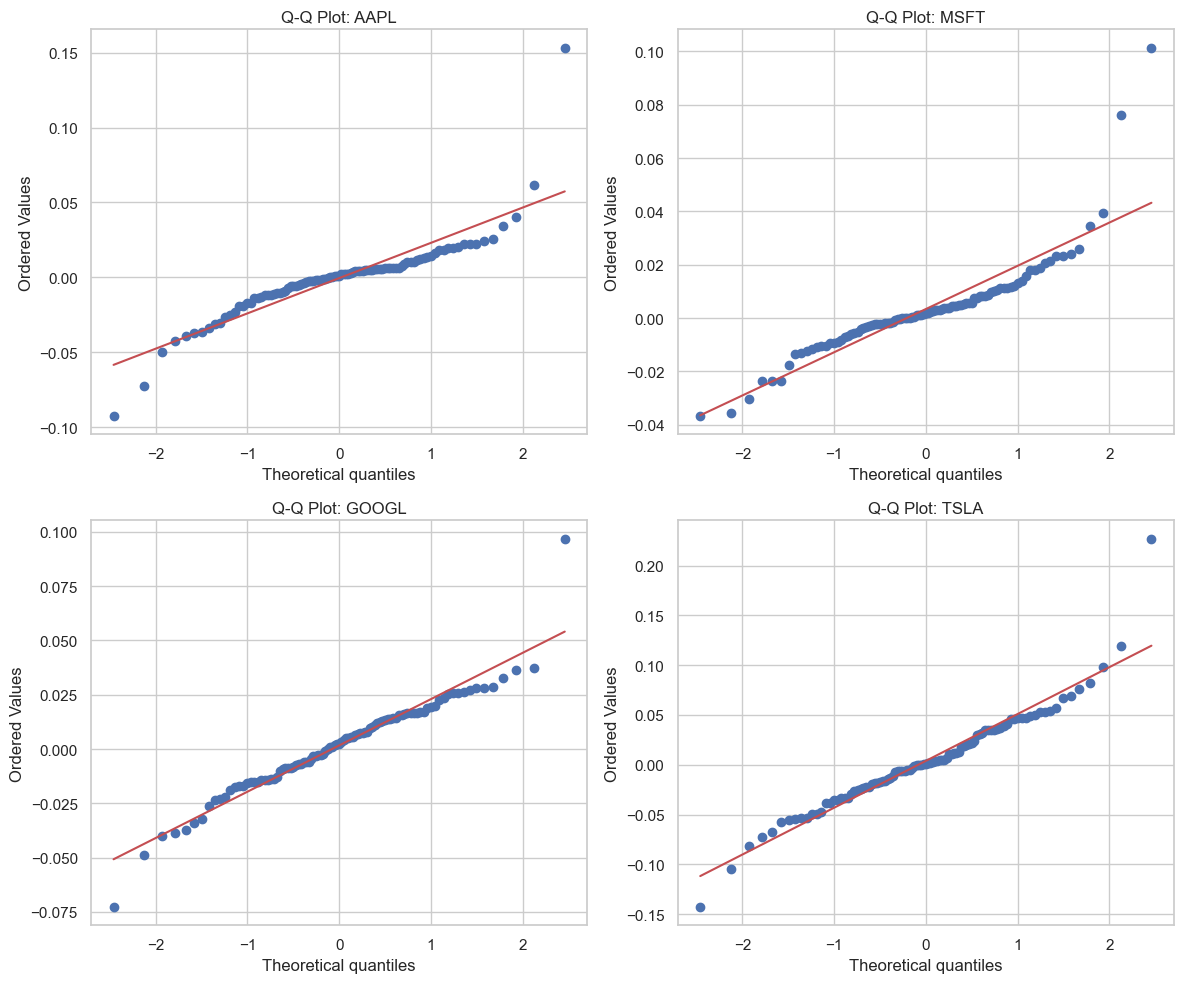

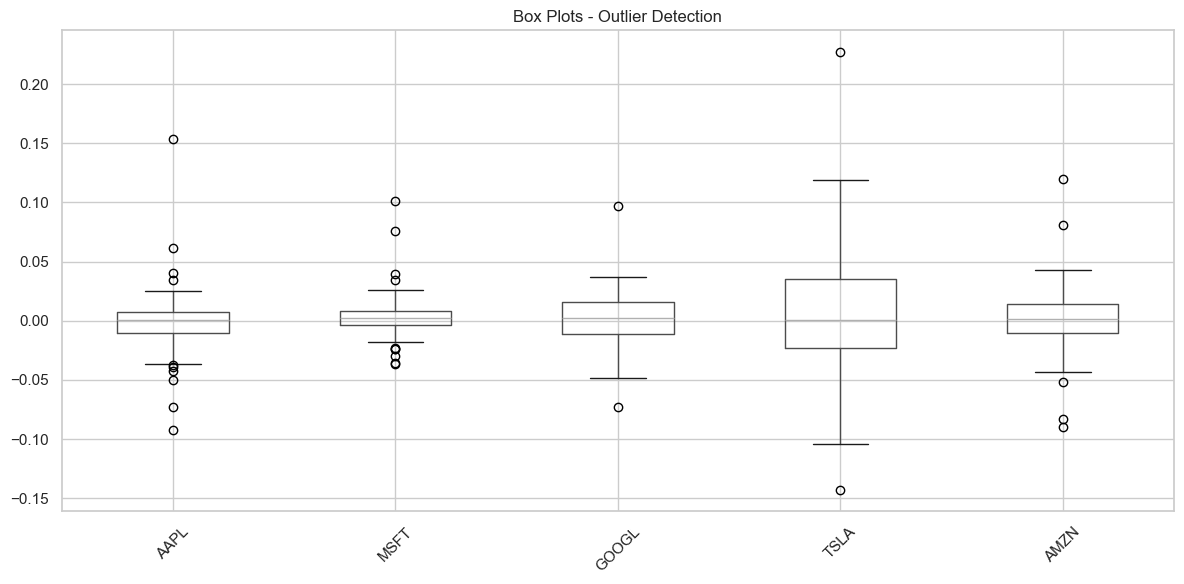

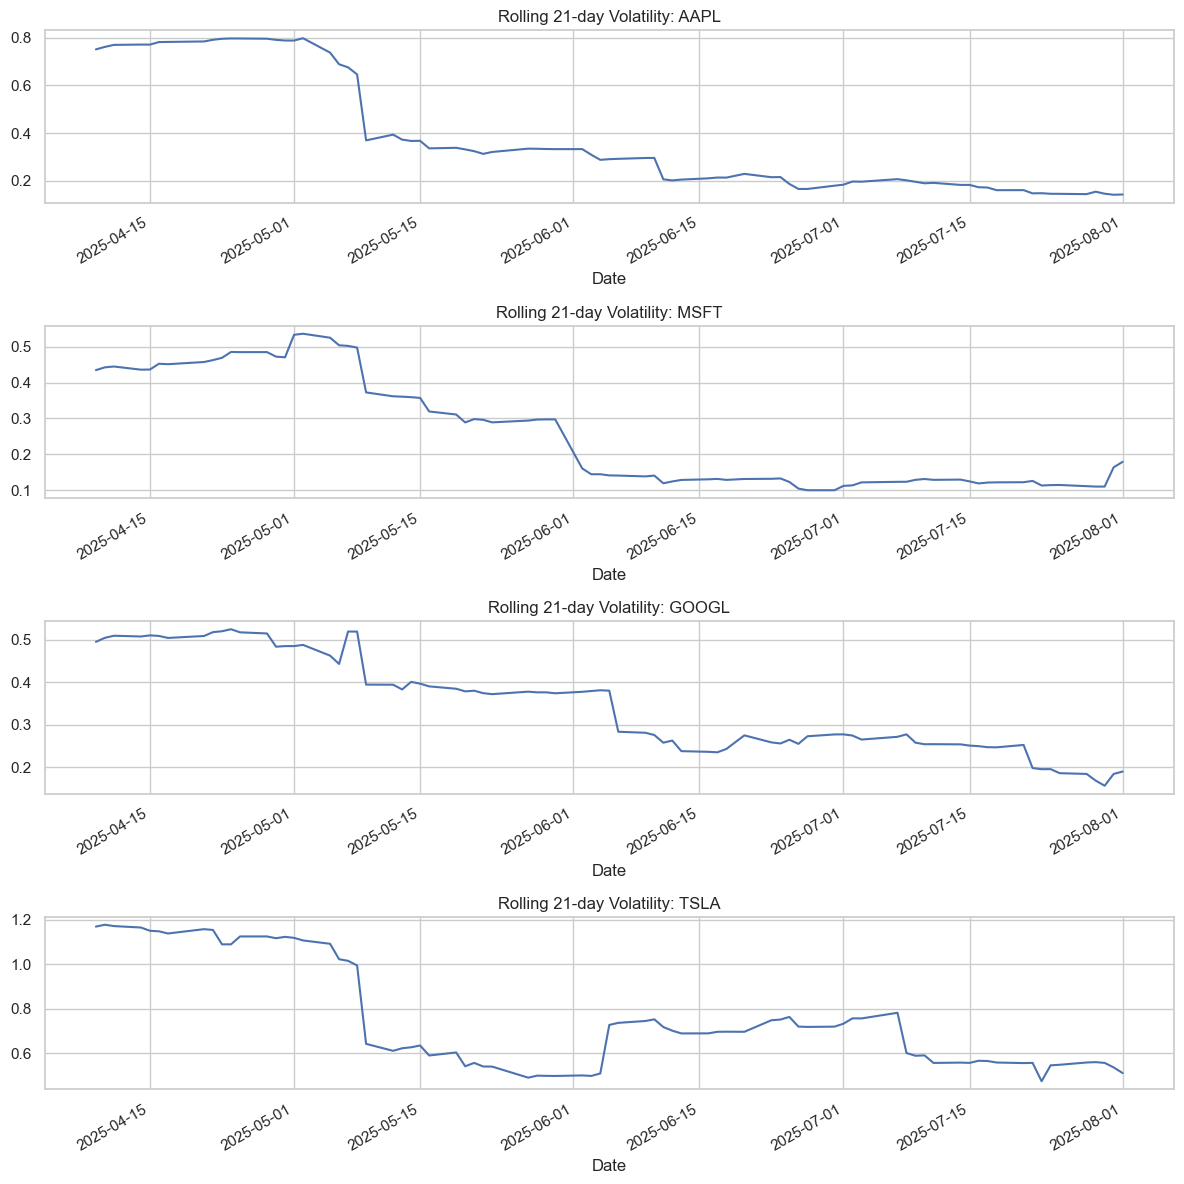


COMPREHENSIVE SUMMARY
       Count     Mean      Std      Min      Max  Skewness  Kurtosis  \
AAPL    99.0 -0.00055  0.02618 -0.09246  0.15329   1.40032  15.36389   
MSFT    99.0  0.00339  0.01787 -0.03661  0.10134   2.15775  13.39549   
GOOGL   99.0  0.00167  0.02173 -0.07260  0.09682   0.22271   6.54305   
TSLA    99.0  0.00387  0.04804 -0.14260  0.22690   0.77019   7.18112   
AMZN    99.0  0.00122  0.02591 -0.08979  0.11977   0.39543   8.83618   

       JB p-value  ADF p-value   VaR 5%  Annualized Vol  DW Statistic  
AAPL          0.0      0.00000 -0.03752         0.41559       2.06777  
MSFT          0.0      0.00000 -0.02342         0.28363       2.02738  
GOOGL         0.0      0.00004 -0.03428         0.34489       2.06574  
TSLA          0.0      0.00000 -0.05851         0.76267       2.04524  
AMZN          0.0      0.00000 -0.03174         0.41130       2.13503  


In [ ]:
normality_df = pd.DataFrame(normality_results).T

print("\n" + "=" * 60)
print("STATIONARITY TESTS (ADF)")
print("=" * 60)

stationarity_results = {}
for stock in stock_cols:
    data = df[stock].dropna()
    adf_stat, adf_pval, _, _, crit_vals, _ = adfuller(data)

    stationarity_results[stock] = {
        'ADF Statistic': adf_stat,
        'p-value': adf_pval,
        'Stationary': adf_pval < 0.05
    }

    print(f"{stock}: ADF p-value = {adf_pval:.5f} {'(Stationary)' if adf_pval < 0.05 else '(Non-stationary)'}")

print("\n" + "=" * 60)
print("HETEROSCEDASTICITY TESTS")
print("=" * 60)

hetero_results = {}
for stock in stock_cols:
    data = df[stock].dropna()

    X = np.arange(len(data)).reshape(-1, 1)

    try:
        bp_stat, bp_pval, _, _ = het_breuschpagan(data, X)
        hetero_results[stock] = {
            'Breusch-Pagan p-value': bp_pval,
            'Heteroscedastic': bp_pval < 0.05
        }
        print(f"{stock}: BP p-value = {bp_pval:.5f} {'(Heteroscedastic)' if bp_pval < 0.05 else '(Homoscedastic)'}")
    except:
        print(f"{stock}: Heteroscedasticity test failed")

print("\n" + "=" * 60)
print("ARCH EFFECTS TESTING")
print("=" * 60)

arch_results = {}
for stock in stock_cols:
    data = df[stock].dropna()

    try:
        model = arch_model(data, vol='ARCH', p=1)
        fitted_model = model.fit(disp='off')

        residuals = data - data.mean()
        squared_residuals = residuals ** 2

        arch_test_stat = len(data) * np.corrcoef(squared_residuals[:-1], squared_residuals[1:])[0, 1] ** 2
        arch_pval = 1 - stats.chi2.cdf(arch_test_stat, 1)

        arch_results[stock] = {
            'ARCH Test p-value': arch_pval,
            'ARCH Effects': arch_pval < 0.05
        }

        print(
            f"{stock}: ARCH p-value = {arch_pval:.5f} {'(ARCH effects)' if arch_pval < 0.05 else '(No ARCH effects)'}")
    except:
        print(f"{stock}: ARCH test failed")

print("\n" + "=" * 60)
print("AUTOCORRELATION ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(len(stock_cols[:4]), 2, figsize=(15, 3 * len(stock_cols[:4])))
if len(stock_cols) == 1:
    axes = axes.reshape(1, -1)

for i, stock in enumerate(stock_cols[:4]):
    data = df[stock].dropna()

    acf_vals = acf(data, nlags=20, fft=False)
    axes[i, 0].bar(range(len(acf_vals)), acf_vals)
    axes[i, 0].set_title(f'ACF - {stock}')
    axes[i, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i, 0].axhline(y=1.96 / np.sqrt(len(data)), color='red', linestyle='--', alpha=0.5)
    axes[i, 0].axhline(y=-1.96 / np.sqrt(len(data)), color='red', linestyle='--', alpha=0.5)

    pacf_vals = pacf(data, nlags=20)
    axes[i, 1].bar(range(len(pacf_vals)), pacf_vals)
    axes[i, 1].set_title(f'PACF - {stock}')
    axes[i, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i, 1].axhline(y=1.96 / np.sqrt(len(data)), color='red', linestyle='--', alpha=0.5)
    axes[i, 1].axhline(y=-1.96 / np.sqrt(len(data)), color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DURBIN-WATSON TEST (Serial Correlation)")
print("=" * 60)

dw_results = {}
for stock in stock_cols:
    data = df[stock].dropna()
    dw_stat = durbin_watson(data)

    dw_results[stock] = dw_stat

    if dw_stat < 1.5:
        interpretation = "Positive autocorrelation"
    elif dw_stat > 2.5:
        interpretation = "Negative autocorrelation"
    else:
        interpretation = "No significant autocorrelation"

    print(f"{stock}: DW = {dw_stat:.4f} ({interpretation})")

print("\n" + "=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

outlier_results = {}
for stock in stock_cols:
    data = df[stock].dropna()

    z_scores = np.abs(stats.zscore(data))
    z_outliers = np.sum(z_scores > 3)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = np.sum((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

    outlier_results[stock] = {
        'Z-score outliers (>3σ)': z_outliers,
        'IQR outliers': iqr_outliers,
        'Total observations': len(data),
        'Z-score outlier %': (z_outliers / len(data)) * 100,
        'IQR outlier %': (iqr_outliers / len(data)) * 100
    }

    print(
        f"{stock}: Z-score outliers: {z_outliers} ({(z_outliers / len(data) * 100):.2f}%), IQR outliers: {iqr_outliers} ({(iqr_outliers / len(data) * 100):.2f}%)")

print("\n" + "=" * 60)
print("RISK METRICS")
print("=" * 60)

risk_results = {}
for stock in stock_cols:
    data = df[stock].dropna()

    var_5 = np.percentile(data, 5)
    var_1 = np.percentile(data, 1)

    cvar_5 = data[data <= var_5].mean()
    cvar_1 = data[data <= var_1].mean()

    cumulative = (1 + data).cumprod()
    rolling_max = cumulative.expanding().max()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = drawdown.min()

    risk_results[stock] = {
        'VaR 5%': var_5,
        'VaR 1%': var_1,
        'CVaR 5%': cvar_5,
        'CVaR 1%': cvar_1,
        'Max Drawdown': max_drawdown,
        'Volatility (annualized)': data.std() * np.sqrt(252)
    }

    print(f"{stock}:")
    print(f"  VaR (5%): {var_5:.5f}, CVaR (5%): {cvar_5:.5f}")
    print(f"  VaR (1%): {var_1:.5f}, CVaR (1%): {cvar_1:.5f}")
    print(f"  Max Drawdown: {max_drawdown:.5f}")
    print(f"  Annualized Volatility: {data.std() * np.sqrt(252):.5f}")

print("\n" + "=" * 60)
print("DISTRIBUTION FITTING")
print("=" * 60)

sample_stock = stock_cols[0]
data = df[sample_stock].dropna()

distributions = [stats.norm, stats.t, stats.skewnorm, stats.laplace]
dist_results = {}

for dist in distributions:
    try:
        params = dist.fit(data)
        ks_stat, ks_pval = stats.kstest(data, lambda x: dist.cdf(x, *params))

        dist_results[dist.name] = {
            'KS statistic': ks_stat,
            'KS p-value': ks_pval,
            'Parameters': params
        }

        print(f"{dist.name}: KS p-value = {ks_pval:.5f}")
    except:
        print(f"Failed to fit {dist.name}")

print("\n" + "=" * 60)
print("VISUALIZATIONS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, stock in enumerate(stock_cols[:4]):
    row, col = i // 2, i % 2
    data = df[stock].dropna()
    stats.probplot(data, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q Plot: {stock}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df[stock_cols].boxplot()
plt.title('Box Plots - Outlier Detection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(stock_cols[:4]), 1, figsize=(12, 3 * len(stock_cols[:4])))
if len(stock_cols) == 1:
    axes = [axes]

for i, stock in enumerate(stock_cols[:4]):
    rolling_vol = df[stock].rolling(window=21).std() * np.sqrt(252) 
    rolling_vol.plot(ax=axes[i], title=f'Rolling 21-day Volatility: {stock}')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("COMPREHENSIVE SUMMARY")
print("=" * 60)

summary_stats = {}
for stock in stock_cols:
    data = df[stock].dropna()

    summary_stats[stock] = {
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data, fisher=False),
        'JB p-value': normality_results.get(stock, {}).get('Jarque-Bera p-value', np.nan),
        'ADF p-value': stationarity_results.get(stock, {}).get('p-value', np.nan),
        'VaR 5%': risk_results.get(stock, {}).get('VaR 5%', np.nan),
        'Annualized Vol': risk_results.get(stock, {}).get('Volatility (annualized)', np.nan),
        'DW Statistic': dw_results.get(stock, np.nan)
    }

summary_df = pd.DataFrame(summary_stats).T
print(summary_df.round(5))